In [ ]:
import cv2
import matplotlib.pyplot as plt
import zipfile

In [ ]:
with zipfile.ZipFile("/content/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
cat_image = cv2.imread("/content/towelrolls-300x300.jpeg")
rgb_cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)

In [ ]:
fast_detector = cv2.FastFeatureDetector_create()
fast_detector.setThreshold(10)
fast_detector.setNonmaxSuppression(0)
keypoints = fast_detector.detect(rgb_cat_image)
labeled_img = cv2.drawKeypoints(rgb_cat_image, keypoints, None, color = (255, 0, 0))

In [ ]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes = 64)
keypoints, descriptors = brief.compute(rgb_cat_image, keypoints)


In [ ]:
len(keypoints)

369

In [ ]:
descriptors.shape

(369, 64)

In [ ]:
cv2.imwrite("labeled_image.jpg", labeled_img)

True

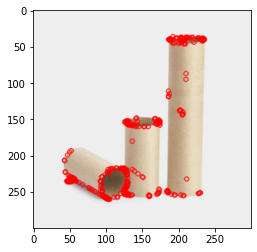

In [ ]:
plt.imshow(labeled_img)

# New exploration on Clustering with OpenCV segmentation

In [10]:
import cv2 # lib for opencv
import matplotlib.pyplot as plt
import numpy as np

In [38]:
tree_image = cv2.imread("/content/flying_bird.jpeg")
tree_image = cv2.cvtColor(tree_image, cv2.COLOR_BGR2RGB)
print(tree_image.shape)
image_vec = np.float32(tree_image.reshape((-1, 3)))
print(image_vec.shape)

cluster_amount = 2 # One bird, the sky.

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center= cv2.kmeans(image_vec, cluster_amount,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

(960, 1280, 3)
(1228800, 3)


In [25]:
np.unique(label.squeeze())

array([0, 1, 2], dtype=int32)

In [39]:
center = np.uint8(center) # so the image can be plotted easily
segmented_color_for_each_pixel = center[label.squeeze()]
segmented_color_for_each_pixel = segmented_color_for_each_pixel.reshape(tree_image.shape)
print(segmented_color_for_each_pixel.shape)

(960, 1280, 3)


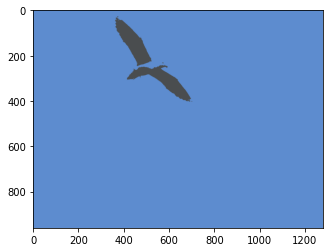

In [40]:
plt.imshow(segmented_color_for_each_pixel)

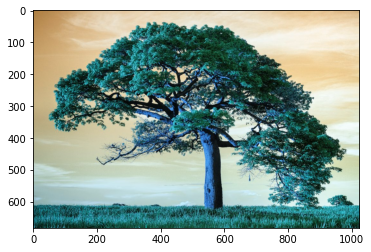

In [5]:
plt.imshow(tree_image)

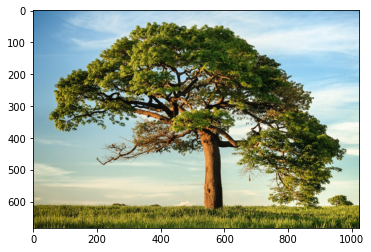

In [8]:
plt.imshow(tree_image)

In [6]:
tree_image.shape

(683, 1024, 3)